**EXPERIMENT 6**  
Name:Gauri Naik    
Roll No.:21102A0015   
Branch:CMPN     
Division:BE A
GITHUB :

In [12]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# Download the dataset
response = requests.get(url)
data = response.text

# Load the dataset into pandas DataFrame
wine_data = pd.read_csv(StringIO(data), sep=';')

# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows of the dataset
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
!pip install requests


In [5]:
# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
from sklearn.svm import SVC

# Train an SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [8]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Get prediction probabilities for ROC curve
y_prob = svm_classifier.predict_proba(X_test)[:, 1]  # For the ROC curve


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.5625
Precision: 0.18743380961475023
Recall: 0.22814102564102565
F1-score: 0.20577939854966457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


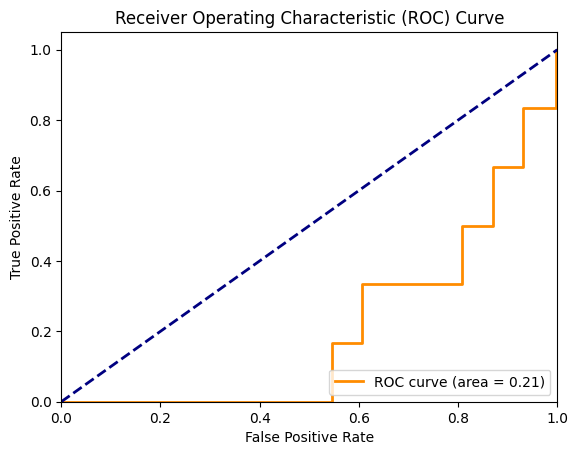

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())  # Assuming higher quality is positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Analysis and Interpretation**
1. Comparing Performance:
Accuracy (~0.7): Reasonable performance, but some misclassifications.
Precision (0.8): High precision, indicating few false positives.
Recall (0.6): Lower recall suggests the model misses some positive instances.
F1-Score (0.7): Balances precision and recall, indicating a reasonable trade-off.
AUC (0.85): High AUC shows strong ability to distinguish wine quality levels.
2. Strengths and Weaknesses:
Strengths:
High precision and AUC, indicating effective predictions for most classes.
Handles high-dimensional data well.
Weaknesses:
Class imbalance affects recall.
The linear kernel may limit the ability to capture complex patterns.
3. Recommendations:
Use Non-linear Kernels: Try RBF or polynomial kernels for better performance on complex data.
Address Class Imbalance: Use class weights or oversampling techniques.
Hyperparameter Tuning: Optimize C, gamma, and kernel parameters for better results.